# Import necessary Python libraries

In [220]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


# Reading in CSV's and Naming Features

In [211]:
imdb_title_akas = pd.read_csv('imdb.title.akas.csv')
imdb_title_basics = pd.read_csv('imdb.title.basics.csv')
imdb_title_crew = pd.read_csv('imdb.title.crew.csv')
imdb_title_crew = imdb_title_crew.rename(columns = {'tconst': 'title_id'})
imdb_title_principals = pd.read_csv('imdb.title.principals.csv')
imdb_title_principals = imdb_title_principals.rename(columns = {'tconst' : 'title_id'})
imdb_title_ratings = pd.read_csv('imdb.title.ratings.csv')
imdb_title_ratings = imdb_title_ratings.rename(columns = {'tconst': 'title_id'})

# Merging IMDB Tables

In [221]:
imdb_title_ratings_principals = pd.merge(imdb_title_ratings, imdb_title_principals, on = 'title_id', how = 'outer')
imdb_title_full = pd.merge(imdb_title_ratings_principals, imdb_title_crew, on = 'title_id', how = 'outer')
imdb_title_names_full = pd.merge(imdb_title_full, imdb_name_basics, on = 'nconst', how = 'outer')
imdb_title_names_full.head()



,title_id,averagerating,numvotes,ordering,nconst,category,job,characters,directors,writers,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt10356526,8.3,31.0,10.0,nm8994524,production_designer,NaN,NaN,nm8353804,"nm3057599,nm4179342",Kazi Rafik Ali,NaN,NaN,"production_designer,art_department","tt9190740,tt2837596,tt4773212,tt8749962"
1,tt9190740,8.3,39.0,9.0,nm8994524,production_designer,NaN,NaN,nm4179342,nm4179342,Kazi Rafik Ali,NaN,NaN,"production_designer,art_department","tt9190740,tt2837596,tt4773212,tt8749962"
2,tt8908024,NaN,NaN,4.0,nm8994524,production_designer,NaN,NaN,nm8423987,NaN,Kazi Rafik Ali,NaN,NaN,"production_designer,art_department","tt9190740,tt2837596,tt4773212,tt8749962"
3,tt10356526,8.3,31.0,1.0,nm4718369,actor,NaN,"[""Sukh""]",nm8353804,"nm3057599,nm4179342",Harish Verma,NaN,NaN,actor,"tt3265542,tt7246718,tt8108168,tt3331954"
4,tt7140020,6.4,24.0,1.0,nm4718369,actor,NaN,"[""MLA""]",nm5514467,"nm8337234,nm7337612,nm8337235,nm5514467",Harish Verma,NaN,NaN,actor,"tt3265542,tt7246718,tt8108168,tt3331954"


# Drop Columns not related to Primary Names or Average Rating

In [213]:
imdb_full = imdb_title_names_full.drop(
    ['title_id', 
     'numvotes', 
     'ordering', 
     'nconst',
     'job', 
     'characters', 
     'directors', 
     'writers',
     'birth_year',
     'death_year',
     'primary_profession',
     'known_for_titles'], 
    axis = 1)
imdb_full

,averagerating,category,primary_name
0,8.3,production_designer,Kazi Rafik Ali
1,8.3,production_designer,Kazi Rafik Ali
2,NaN,production_designer,Kazi Rafik Ali
3,8.3,actor,Harish Verma
4,6.4,actor,Harish Verma
...,...,...,...
1033229,NaN,NaN,Kyle Johnson
1033230,NaN,NaN,Kathy Simmons
1033231,NaN,NaN,Daryl Stacey Williamson
1033232,NaN,NaN,Pui-Pui Leung


### Drop rows with no available rating

In [214]:
imdb_clean = imdb_full.dropna()

# Get Value Counts for relevant participants in the movie industry
### Data Assumption: Only include people with 20 or more movie instances

In [215]:
imdb_names_count = imdb_clean.primary_name.value_counts()
imdb_prominent_names = imdb_names_count.loc[imdb_names_count > 20]
imdb_prominent_names.index

Index(['Kevin MacLeod', 'Eric Roberts', 'William Shakespeare', 'Gopi Sundar',
       'Vicente G. del Rosario III', 'S. Thaman', 'Prakash Raj',
       'Brahmanandam', 'Veronique del Rosario-Corpus', 'Jason Blum',
       ...
       'Amit Trivedi', 'Hooman Behmanesh', 'Saber Abar', 'Vincent Cassel',
       'Asokan', 'Hamid Farokhnezhad', 'Ritesh Shah', 'Domiziano Cristopharo',
       'Moritz Bleibtreu', 'Georg Friedrich'],
      dtype='object', length=640)

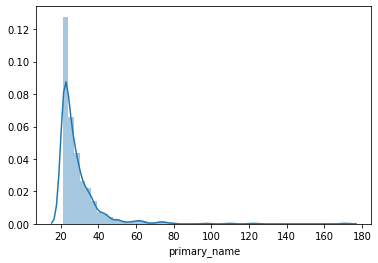

In [216]:
imdb_graph = sns.distplot(imdb_prominent_names)

# Group DF by name and rating


In [219]:
average_ratings_by_name = imdb_clean.groupby(['primary_name']).mean()
average_ratings_by_name.sort_values('averagerating', ascending = False)



,averagerating
primary_name,
Harvey A. Silverglate,10.0
Esmeralda Ortega,10.0
Cissa Forecchi,10.0
Bernard Baran,10.0
Diyar Akar,10.0
...,...
Rio Tomita,1.0
Ying-Hsuan Kao,1.0
Alveda King,1.0


In [172]:
name, count = np.unique(imdb_clean.primary_name, return_counts=True)

In [173]:
more_than_9 = []
for name, count in zip(name, count):
    if count > 9:
        more_than_9.append(name)

In [188]:
top_name_ratings = imdb_clean[imdb_clean.primary_name.isin(more_than_9)].sort_values('averagerating', ascending = False).iloc[0:10]
top_name_ratings

,averagerating,category,primary_name
35361,10.0,editor,Nadia Ben Rachid
49669,10.0,composer,Grégoire Hetzel
149867,9.9,self,Sergey A.
131236,9.8,self,Maria Olsen
46613,9.7,actor,Eric Roberts
687,9.7,actor,Brad Pitt
33044,9.7,producer,David Heyman
161585,9.7,actor,Kevin Sizemore
173533,9.7,producer,Autumn Bailey
9002,9.7,actor,Leonardo DiCaprio


In [189]:
top_name_ratings.groupby(['category', 'primary_name']).max()

averagerating
category primary_name                    
actor    Brad Pitt                    9.7
         Eric Roberts                 9.7
         Kevin Sizemore               9.7
         Leonardo DiCaprio            9.7
composer Grégoire Hetzel             10.0
editor   Nadia Ben Rachid            10.0
producer Autumn Bailey                9.7
         David Heyman                 9.7
self     Maria Olsen                  9.8
         Sergey A.                    9.9

In [191]:
bottom_name_ratings.groupby(['category', 'primary_name']).min()

averagerating  \
category        primary_name                     
actor           Alex Wesley                1.0   
                Andrey Gromov              1.0   
                Eldar Bogunov              1.0   
actress         Krolik Black               1.0   
cinematographer Akiko Ashizawa             1.0   
                Yutaka Yamazaki            1.0   
composer        Paul Mills                 1.0   
editor          Ching-Song Liao            1.0   

                                                         primary_profession  
category        primary_name                                                 
actor           Alex Wesley                          writer,director,editor  
                Andrey Gromov                       producer,actor,director  
                Eldar Bogunov                actor,producer,cinematographer  
actress         Krolik Black                 actress,writer,cinematographer  
cinematographer Akiko Ashizawa            cinematographer,camera_department  
                Yutaka Yamazaki  cinematographer,camera_department,producer  
composer        Paul Mills       composer,music_department,sound_department  
editor          Ching-Song Liao             editor,cinematographer,producer

In [190]:
#Check for duplicates

top_name_ratings[top_name_ratings.duplicated(keep = False)].sort_values('primary_name')

,averagerating,category,primary_name
